# Long Short Term Memory

On teste sur les données:

- des phrases Française et/ou Anglaises
- du prix du bitcoin

In [48]:
doc_file_path = "../../MachineLearning/data3.txt"

def is_ascii(s):
    return all(ord(c) < 128 for c in s)

def clean_word(word):
    return ''.join(c for c in word if c.isalnum())

def clean_text(text):
    output = str(text)
    for c in ".,;:/\\'\"!?$€£*()[]{}#`ɨ-»«… ’<>":
        output = output.replace(c, " ")
    # for c in "0123456789":
    #    output = output.replace(c, "")
    return output.strip()

# on concatene tous les documents du corpus
from collections import Counter
text = ""
words_count = Counter()

with open(doc_file_path, "rt") as f:
    for i, line in enumerate(f.readlines()):
        text = clean_text(line[1:])
        # text = line[1:]
        line_words = text.split(" ")
        line_words = [clean_word(word.lower()) for word in line_words if word != ""]
        # union of global and local sets
        words_count.update(line_words)

In [84]:
print(type(words_count.most_common(10)))


<class 'list'>


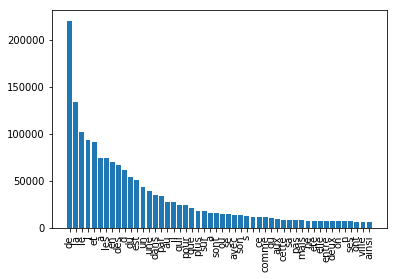

6015


In [91]:
import matplotlib.pyplot as plt

words, counts = zip(*words_count.most_common(50))
plt.bar(words, counts)
plt.xticks(words, words, rotation='vertical')
plt.show()
print(words_count["ainsi"])

In [103]:
vocabulary = set([w for w,count in words_count.items() if count > 1000])
print("nombre de mots uniques", len(vocabulary))

nombre de mots uniques 293


In [64]:
# on contruit la liste des mots avec uniquement les mots les plus fréquents            
words_list = []
with open(doc_file_path, "rt") as f:
    for i, line in enumerate(f.readlines()):
        text = clean_text(line[1:])
        # text = line[1:]
        line_words = text.split(" ")
        line_words = [clean_word(word.lower()) for word in line_words if word in vocabulary and word != ""]        
        #words_set |= set(line_words)
        words_list.extend(line_words)
words_set = vocabulary
n_unique_words = len(words_set)
print("nombre de mots unique:", n_unique_words)
print("nombre de mots dans le corpus", len(words_list))


nombre de mots unique: 10000
nombre de mots dans le corpus 3050156


In [65]:
# on crée des index
word_index = {w:i for (i,w) in enumerate(words_set)}
# index_word = {i:w for (i,w) in enumerate(words_set)}
# del(words_set)

In [70]:
# on construit les phrases pour l'apprentissage
phrase_length = 4
word_steps = 3
# l'entrée
phrases = []
# la sortie
next_words = []
for i in range(0, len(words_list) - phrase_length, word_steps):
    # on garde la phrase: entrée
    phrases.append(words_list[i : i+phrase_length])
    # on garde le mot suivant: sortie
    next_words.append(words_list[i + phrase_length])

In [12]:
del(words_list)

In [71]:
n_phrases = len(phrases)
print("nombre de phrases:", n_phrases)
for i in range(n_phrases):
    if i%100000 == 0:
        print(phrases[i], next_words[i])
print(phrases[0], next_words[0])

nombre de phrases: 1016718
['roman', 'titre', 'original', 'est'] un
['la', 'biologie', 'la', 'géométrie'] et
['depuis', '1994', 'au', 'sein'] du
['à', 'un', 'large', 'éventail'] de
['un', 'durant', '10', 'minutes'] et
['ou', 'fenêtres', 'également', 'appelées'] dans
['vont', 'leurs', 'des', 'humains'] seront
['du', 'est', 'limitrophe', 'des'] départements
['savants', 'qui', 'lui', 'a'] un
['va', 's', 'intégrer', 'au'] de
['du', 'régime', 'des', 'quelques'] mois
['roman', 'titre', 'original', 'est'] un


In [77]:
# on vectorise les phrases et "mot suivant"
import numpy as np
X_shape = (int(n_phrases/100), phrase_length, n_unique_words)
print("nombre de documents", X_shape[0])
print("nombre de mots par doc", X_shape[1])
print("taille du vecteur de mot", X_shape[2])
print("nombre de points", X_shape[0] * X_shape[1] * X_shape[2])
Y_shape = (n_phrases, n_unique_words)
X = np.zeros(X_shape, dtype=bool)
Y = np.zeros(Y_shape, dtype=bool)
# on boucle sur les phrases et mot suivant
# pour vectoriser les données
for ip, phrase in enumerate(phrases):
    for iw, word in enumerate(phrase):
        X[ip, iw, word_index[word]] = 1
    Y[ip, word_index[next_words[ip]]] = 1
print("X", X[0, 0, :])

nombre de documents 10167
nombre de mots par doc 4
taille du vecteur de mot 10000
nombre de points 406680000


MemoryError: 